In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**28
from matplotlib import animation
from IPython.display import HTML
from common import set_figure

#### Problem description

Here you will set up the problem for
$$ u_t + c u_x = 0$$
with periodic BC on the interval [0,1]

In [9]:
c = 1.0
T = 1.0 / c # end time

nx = 128
x = np.linspace(0, 1, nx, endpoint=False)
hx = x[1] - x[0]
xx = np.linspace(0, 1, 100, endpoint=False)

lmbda = 0.98
ht = hx * lmbda / c
nt = int(T/ht)
print(f'     T = {T}')
print(f'tsteps = {nt}')
print(f'    hx = {hx}')
print(f'    ht = {ht}')
print(f'lambda = {lmbda}')

def uinit(x):
    u = np.zeros(x.shape)
    #u[np.intersect1d(np.where(x>0.4), np.where(x<0.6))] = 1.0
    u = np.exp(-(x-0.5)**2/.01)
    return u

     T = 1.0
tsteps = 130
    hx = 0.0078125
    ht = 0.00765625
lambda = 0.98


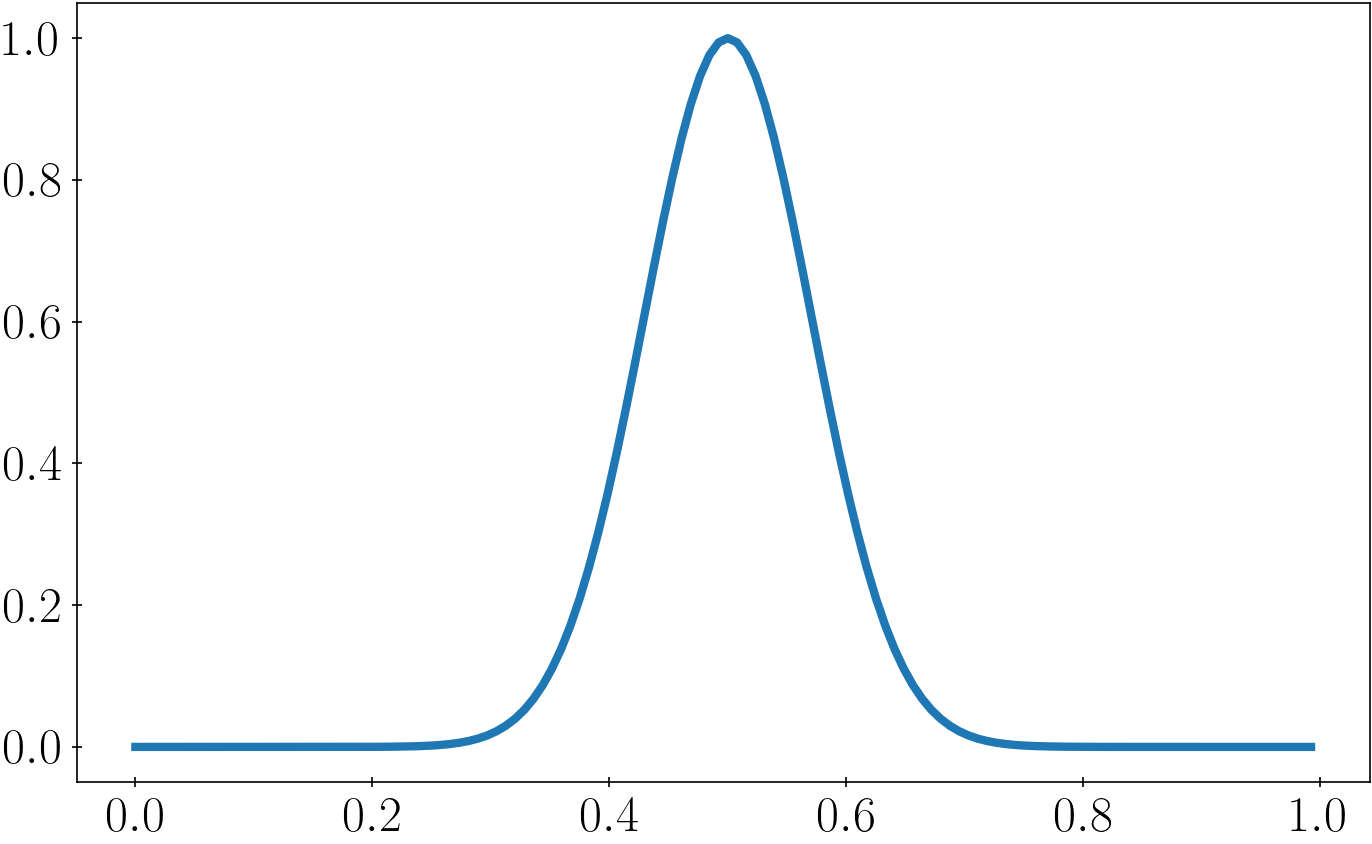

In [10]:
plt.plot(x, uinit(x), lw=3, clip_on=False)

In [11]:
J = np.arange(0, nx)  # all vertices
Jm1 = np.roll(J, 1)
Jp1 = np.roll(J, -1)

In [21]:
import time

method = 'ETBS'

u = uinit(x)

fig, ax = plt.subplots()
ax.set_title('u vs x')
line1, = ax.plot(xx, uinit(xx), lw=3, clip_on=False)
line2, = ax.plot(x, u, '-o', lw=3, clip_on=False)

        
def timestepper(n):
    
    u[J] = u[J] - lmbda * (u[J] - u[Jm1])
    
    # exact solution
    uexact = uinit((xx - c * (n+4) * ht) % 1.0)
        
    line1.set_data(xx, uexact)
    line2.set_data(x, u)
    
    return line1, line2

ani = animation.FuncAnimation(fig, timestepper, frames=nt, interval=20,
                              blit=True)
html = HTML(ani.to_jshtml())
plt.clf()
html

<Figure size 690x426 with 0 Axes>

#### Check the error

In [8]:
uex = uinit((x - c * (nt+1) * ht) % 1.0)
error = u - uex
l2err = np.sqrt(hx * np.sum(error**2))
print(ht, hx, l2err)

0.0153125 0.015625 0.10586835911623653


In [14]:
uex = uinit((x - c * (nt+1) * ht) % 1.0)
error = u - uex
l2err = np.sqrt(hx * np.sum(error**2))
print(ht, hx, l2err)

0.00765625 0.0078125 0.05383291759620041
